# Github: <font color=orange><a href='https://github.com/dimonko1'>@dimonko1</a></font>
<hr>

### При необходимости скачайте необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as sns
import plotly.offline as pyo
import pylab

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'

## <font color=7E87FC>Standard Brownian Motion Simulation</font>:
### Используя случайную величину $X$ со стандартным нормальным распределением $N(0,1)$, можем воспроизвести <font color=7E87FC>Броуновское движение</font> (Brownian Motion, или Wiener Process), которое предельным случаем симметричного случайного блуждания (Symmetric Random Walk) при количестве шагов $n\rightarrow \infty$.
### Параметры процесса:

In [2]:
num = int(input('Введите число траекторий: '))
steps = int(input('Число шагов процесса: '))
S_0 = int(input('Значение начала процесса (e.g. 0): '))

Введите число траекторий:  5
Число шагов процесса:  500
Значение начала процесса (e.g. 0):  0


### Реализация:

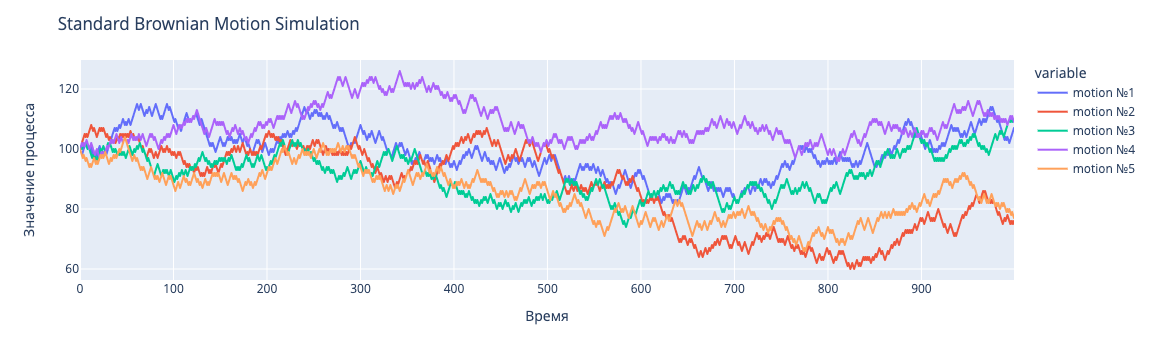

In [78]:
brownian = [S_0]

df = pd.DataFrame(index=range(steps), columns=['lol'])
for i in range(1,num+1):
    for j in range(steps):
        X = np.random.normal(loc=0,scale=1)
        if X < 0:
            X = -1
        else:
            X = 1
        y = brownian[-1] + X
        brownian.append(y)
    df_temp = pd.DataFrame(brownian, index=range(len(brownian)), columns=['motion №{}'.format(i)])
    brownian = [S_0]

    if i == 1:
        df = df.join(df_temp)
        df = df.drop('lol', axis=1)
    else:
        df = pd.merge(df, df_temp, left_index=True, right_index=True)

df.plot().update_layout(autosize=True, title='Standard Brownian Motion Simulation', xaxis_title='Время', yaxis_title='Значение процесса')

<hr>

## <font color=7E87FC>Geometric Brownian Motion Simulation</font>:
### Геометрическое Броуновское движение – процесс, определённый при начальном $S_0>0$, со следующей динамикой, описываем стохастическим дифференциальным уравнением:
### $dS_t = \mu S_t dt + \sigma S_t dW_t$
### В интегральном виде:
### $\log S_t = \log S_0 + \int_0^t (\mu-\frac{\sigma^2}{2})ds + \int_0^t \sigma dW_s$
### $\log S_t = \log S_0 + (\mu-\frac{\sigma^2}{2})t+\sigma W_t$
### $\log S_t \sim N(\log S_0+(\mu-\frac{\sigma^2}{2})t, \sigma^2t)$
### В явном выражении:
### $S_t = S_0e^{(\mu-\frac{\sigma^2}{2})t+\sigma W_t}$

In [79]:
num = int(input('Введите число траекторий: '))
steps = int(input('Число шагов процесса: '))
S_0 = float(input('Значение начала процесса (e.g. 0): '))
mu = float(input('Коэффициент сноса (drift) μ: '))
sigma = float(input('Волатильность σ: '))
T = float(input('Time in years (выраженное в годах): '))

Введите число траекторий:  5
Число шагов процесса:  5000
Значение начала процесса (e.g. 0):  100
Коэффициент сноса (drift) μ:  0.2
Волатильность σ:  0.3
Time in years (выраженное в годах):  1


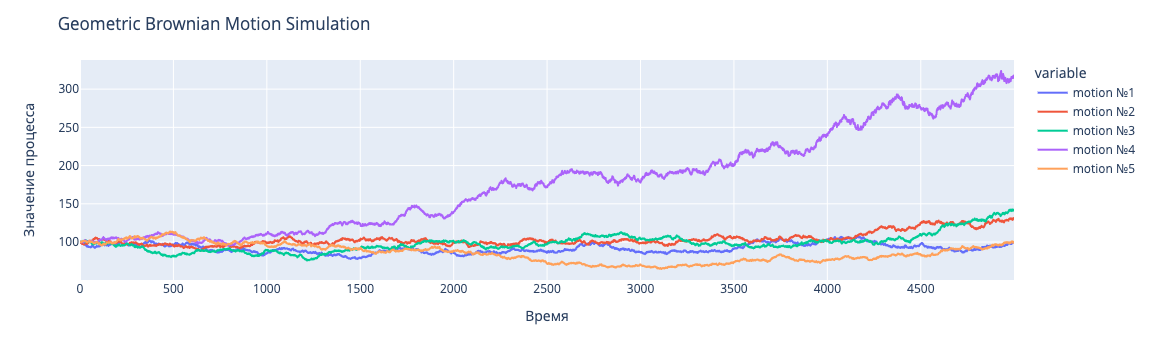

In [80]:
df = pd.DataFrame(index=range(steps), columns=['lol'])
dt = T/steps

for i in range(1,num+1):
    St = np.exp((mu - sigma**2/2)*dt+sigma*np.random.normal(0,np.sqrt(dt), size=(1, steps)).T)
    #St = np.vstack([np.ones(num), St])
    St = S_0*St.cumprod(axis=0)
    df_temp = pd.DataFrame(St, index=range(len(St)), columns=['motion №{}'.format(i)])

    if i == 1:
        df = df.join(df_temp)
        df = df.drop('lol', axis=1)
    else:
        df = pd.merge(df, df_temp, left_index=True, right_index=True)

df.plot().update_layout(autosize=True, title='Geometric Brownian Motion Simulation', xaxis_title='Время', yaxis_title='Значение процесса')